In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
preg_raw = pd.read_csv("2002FemPregOut.csv")
preg_raw = preg_raw.dropna()
preg_raw.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglngth,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,3316.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,3925.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,1433.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,1783.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,1833.0,12999.542264


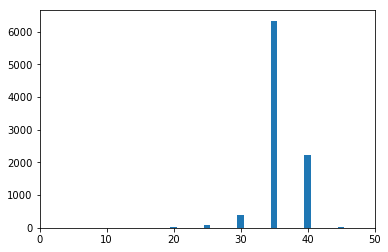

In [7]:
# PMF to plot first
hist_vals, bin_edges = np.histogram(preg_raw['prglngth'])
plt.bar(bin_edges[:-1], hist_vals, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show() 

In [18]:
# CDF
## Method 1 - you get each value's percentile, then divide into same size of bins
def get_lst_percentile(lst):
    result = []
    for elem in lst:
        result.append(round(stats.percentileofscore(lst, elem))/100.0)
    return result

preg_raw['prglngth_percentile'] = preg_raw['prglngth'].transform(get_lst_percentile)
preg_raw['prglngth_percentile'][4:10]

4    0.50
5    0.21
6    0.81
7    0.96
8    0.50
9    0.07
Name: prglngth_percentile, dtype: float64

In [24]:
hist_vals, bin_edges = np.histogram(preg_raw['prglngth_percentile'])
print(hist_vals)
print(bin_edges)

[ 818  770  603    0    0 4655    0    0 1111 1130]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


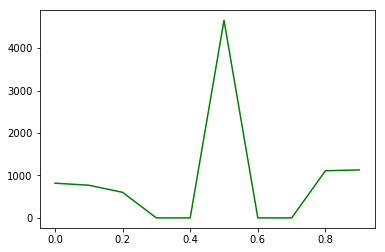

In [36]:
plt.plot(bin_edges[:-1], hist_vals, c='green')
plt.show()

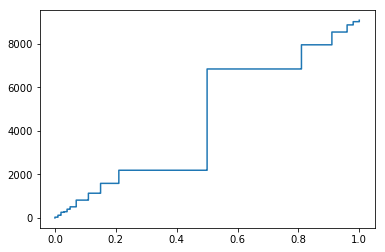

In [30]:
# CDF
# Method 2 - This step method are showing small bin as each step, and plot the count of records in each step
## In a word, binning still required here
sorted_data = np.sort(preg_raw['prglngth_percentile'])
plt.step(sorted_data, np.arange(sorted_data.size)) 
plt.show()

In [33]:
np.arange(sorted_data.size)

array([   0,    1,    2, ..., 9084, 9085, 9086])

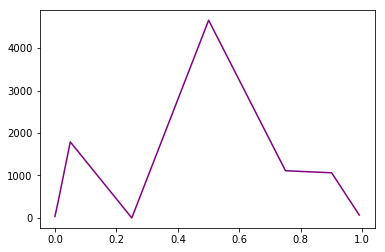

In [40]:
# Method 3 - customized bin sizes
# For example, here, I just want to make bin edges as [0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.99, 1]
def customize_hist_vals(value_lst, bin_edges):
    hist_vals = [0 for i in range(len(bin_edges)-1)]
    for elem in value_lst:
        for i in range(1,len(bin_edges)):
            if i==(len(bin_edges)-1):
                hist_vals[i-1]+=1
            else:
                if elem >= bin_edges[i-1] and elem < bin_edges[i]:
                    hist_vals[i-1]+=1
                    break
    return hist_vals

bin_edges = [0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.99, 1]
hist_vals = customize_hist_vals(preg_raw['prglngth_percentile'], bin_edges)
plt.plot(bin_edges[:-1], hist_vals, c='purple')
plt.show()

In [43]:
# Now let's check the probability between first born pregency length and other born pregency length

first_baby = preg_raw.where(preg_raw['birthord']==1.0).dropna()
other_baby = preg_raw.where(preg_raw['birthord']>1.0).dropna()

In [45]:
first_baby['prglngth_percentile'] = first_baby['prglngth'].transform(get_lst_percentile)
other_baby['prglngth_percentile'] = other_baby['prglngth'].transform(get_lst_percentile)

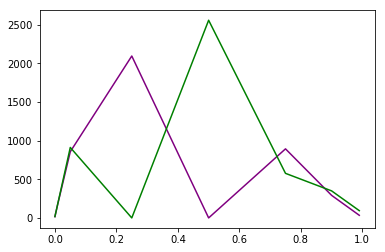

In [46]:
bin_edges = [0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.99, 1]
hist_vals1 = customize_hist_vals(first_baby['prglngth_percentile'], bin_edges)
hist_vals2 = customize_hist_vals(other_baby['prglngth_percentile'], bin_edges)
plt.plot(bin_edges[:-1], hist_vals1, c='purple')
plt.plot(bin_edges[:-1], hist_vals2, c='green')
plt.show()

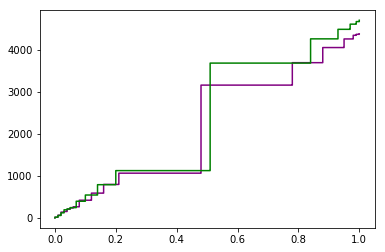

In [50]:
sorted_data1 = np.sort(first_baby['prglngth_percentile'])
sorted_data2 = np.sort(other_baby['prglngth_percentile'])
plt.step(sorted_data1, np.arange(sorted_data1.size),c='purple') 
plt.step(sorted_data2, np.arange(sorted_data2.size),c='green') 
plt.show()

In [ ]:
"""
It seems that, the way you divide bins, could make a difference in comparison...
"""

In [73]:
# Chekc whether Python random uniform numbers are really uniform distribution
import random

random.seed(410)
random_sample_1000 = [random.uniform(0,1) for i in range(1000)]

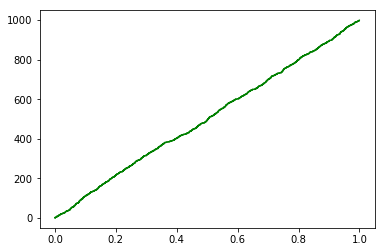

In [68]:
# PMF - wigth step method (small bins)
sorted_data1 = np.sort(random_sample_1000)
plt.step(sorted_data1, np.arange(sorted_data1.size),c='green') 
plt.show()

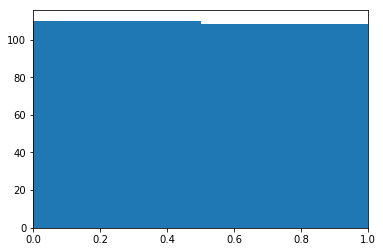

In [69]:
# PMF - histogram, with equal size bins
hist_vals, bin_edges = np.histogram(random_sample_1000)
plt.bar(bin_edges[:-1], hist_vals, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show() 

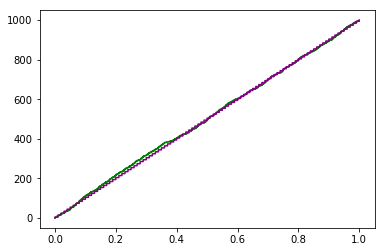

In [71]:
# CDF
sorted_data1 = np.sort(random_sample_1000)
plt.step(sorted_data1, np.arange(sorted_data1.size),c='green') 

sample_percentile = get_lst_percentile(random_sample_1000)
sorted_data2 = np.sort(sample_percentile)
plt.step(sorted_data2, np.arange(sorted_data2.size),c='purple') 
plt.show()

In [ ]:
"""
Yeah, uniform distribution in both PMF, CDF
"""